# Kmeans

Algoritmo de aprendizaje no supervisado que tiene el objetivo agrupar los datos en K clusters homogeneos. El objetivo del kmeans es Encontrar un agrupamiento que maximice la dispersion intercluster y minimice la dispersion intracluster. Esta dispersión es una medida de distancia, la más común es la distancia euclídea.

En informatica, se trata de técnicas disenadas para resolver un problema de manera rapida cuando la aproximacion exhaustiva es muy lenta y/o para encontrar una solucion aproximada cuando encontrar la soluci´on exacta es muy dificil o imposible. Se puede expresar como un trade-off (balance) entre velocidad y optimalidad-completitud.

## intuición

Los clusters homogeneos se agrupan al rededor de un centro, por lo tanto se puede calular:

- centro: El centro de un cluster es la media de los elementos que pertenecen a el.
- Pertenencia: Una instancia pertenece a un cluster si su distancia al centro de ese cluster es la más cercana

La combinación de ambos conceptos permite construir el agrupamiento:

Partiendo de un conjunto de centros aleatorio se busca la mayor pertenencia de los datos a cada cluster y despues actualiza los centros iterativamente para hacer el agrupamiento. Es un algoritmo de naturaleza iterativa.

## pasos del algoritmo

0. El Kmeans recibe el conjunto de entrenamiento
1. Asigna inicialmente (en la iteración 0) aleatoriamente K centros. Los centros no tienen que ser  obligatoriamente. 
2. Asigna cada elemento $xi$ del conjunto de datos de entrenamiento al $k_i$ cluster más cercano, basado en una función de distancia, por lo general la distancia euclidea.

$$ d_E(x_i, x_j) =  \sqrt{\sum_i^{n}{(x_i - x_j)}}$$

3. Para cada cluster K se recalcula su centro $x_k$ (las iteraciones posteriores) los nuevos centroides se calculan con la media de las distancias de las instancias al centroide.

$$ m_i^{(t+1)} = \frac {1}{S_i^t} * \sum_{x_j --> S_i} {x_j}$$

4. Los pasos 2 y 3 se repiten iterativamente hasta que los centro no cambian.

**Devuelve**: conjunto de centros con los datos asignados a cada uno de ellos

## Métricas de distancia

La elección de una métrica apropiada influenciará la forma de los grupos, ya que algunos pueden estar cerca unos de otros de acuerdo a una distancia y más lejos de acuerdo a otra. Por ejemplo, en un espacio 2-dimensional, la distancia entre el punto (1,0) y el origen (0,0) es siempre 1 de acuerdo a las normas usuales, pero la distancia entre el punto (1,1) y el origen (0,0) puede ser 2, ${\displaystyle \scriptstyle {\sqrt {2}}}$ o 1 bajo la distancia Manhattan, la distancia euclidiana o la distancia máxima respectivamente.

Algunas métricas comúnmente usadas para agrupamiento jerárquico son:

<img src= 'img/distancias_clustering.png'>

## Ventajas

- Rápido
- Sencillo
- Intuitivo
- Mejorable

## Desventajas

- El número de clusters es un hiperparametro
- Dependencia de la inicialización
- Dependencia de los outliers
- Funcióna con variables continuas (solución Kmedioids)
- Presenta dificultades cuando los clusters son de diferente tamaño, densidad, o convexidad

## Mejora: Kmeans ++

Se basa en que la eleccion de los centros es más separada, es decir, un punto de entrenamiento tiene más posibilidades de ser escogido como centro si está más alejado de los centros actuales 

0. El Kmeans recibe el conjunto de entrenamiento
1. Elección aletoria de 1 punto como centro primer centro $S(x_1)$.
2. Mientras $S < K$ repetir.
3. Para todos los conjuntos de entrenamiento caluclar la distancia al cada cluster, se asigna el cluster con el centro más cercano $x_k$
4. Muestrear un nuevo conjunto de entrenamiento $x_prima$ donde el caso x tiene un probalibilidad de ser un centro.

## KMeans en sklearn

### parámetros

1. **n_clusters : int, default=8**

- The number of clusters to form as well as the number of centroids to generate.


2. **init: {'k-means++', 'random'}, callable or array-like of shape (n_clusters, n_features), default='k-means++'**

Method for initialization:

- ‘k-means++’ : selects initial cluster centroids using sampling based on an empirical probability distribution of the points’ contribution to the overall inertia. This technique speeds up convergence. The algorithm implemented is “greedy k-means++”. It differs from the vanilla k-means++ by making several trials at each sampling step and choosing the best centroid among them.

- ‘random’: choose n_clusters observations (rows) at random from data for the initial centroids.

- If an array is passed, it should be of shape (n_clusters, n_features) and gives the initial centers.

- If a callable is passed, it should take arguments X, n_clusters and a random state and return an initialization.

- For an example of how to use the different init strategy, see the example entitled A demo of K-Means clustering on the handwritten digits data.


3. **n_init: 'auto' or int, default=10**

Number of times the k-means algorithm is run with different centroid seeds. The final results is the best output of n_init consecutive runs in terms of inertia. Several runs are recommended for sparse high-dimensional problems (see Clustering sparse data with k-means).

- When n_init='auto', the number of runs depends on the value of init: 10 if using init='random' or init is a callable; 1 if using init='k-means++' or init is an array-like.

- New in version 1.2: Added ‘auto’ option for n_init.

- Changed in version 1.4: Default value for n_init will change from 10 to 'auto' in version 1.4.

4. **max_iter: int, default=300**

Maximum number of iterations of the k-means algorithm for a single run.

5. **tol: float, default=1e-4**

Relative tolerance with regards to Frobenius norm of the difference in the cluster centers of two consecutive iterations to declare convergence.

6. **verbose: int, default=0**

Verbosity mode.

7. **random_state: int, RandomState instance or None, default=None**

Determines random number generation for centroid initialization. Use an int to make the randomness deterministic. See Glossary.

8. **copy_x: bool, default=True**

When pre-computing distances it is more numerically accurate to center the data first. If copy_x is True (default), then the original data is not modified. If False, the original data is modified, and put back before the function returns, but small numerical differences may be introduced by subtracting and then adding the data mean. Note that if the original data is not C-contiguous, a copy will be made even if copy_x is False. If the original data is sparse, but not in CSR format, a copy will be made even if copy_x is False.

9. **algorithm: {“lloyd”, “elkan”, “auto”, “full”}, default=”lloyd”**

K-means algorithm to use. The classical EM-style algorithm is "lloyd". The "elkan" variation can be more efficient on some datasets with well-defined clusters, by using the triangle inequality. However it’s more memory intensive due to the allocation of an extra array of shape (n_samples, n_clusters).

"auto" and "full" are deprecated and they will be removed in Scikit-Learn 1.3. They are both aliases for "lloyd".

### atributos

1. **cluster_centers_: ndarray of shape (n_clusters, n_features)**

coordinates of cluster centers. If the algorithm stops before fully converging (see tol and max_iter), these will not be consistent with labels_.

2. **labels_: ndarray of shape (n_samples,)**

Labels of each point

3. **inertia_: float**

Sum of squared distances of samples to their closest cluster center, weighted by the sample weights if provided.

4. **n_iter_: int**

Number of iterations run.

5. **n_features_in_: int**

Number of features seen during fit.
New in version 0.24.

6. **feature_names_in_ndarray of shape (n_features_in_,)**

Names of features seen during fit. Defined only when X has feature names that are all strings.

# Un toy example

Agrupamiento de usuarios de una tarjeta de crédito en base a su saldo en la cuenta.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [2]:
clientes = pd.DataFrame({'saldo': [50000, 45000, 48000, 43500, 47000, 52000,
                                  20000, 26000, 25000, 23000, 21400, 18000,
                                  8000, 12000, 6000, 14500, 12600, 7000],
                        'transacciones': [25, 20, 16, 23, 25, 18,
                                          23, 22, 24, 21, 27, 18,
                                          8, 3, 6, 4, 9, 3]})
display(clientes.sample(3))

,saldo,transacciones
2,48000,16
1,45000,20
13,12000,3


In [3]:
scaler = MinMaxScaler()
clientes_escalados = pd.DataFrame(scaler.fit_transform(clientes), columns= clientes.columns)

display(clientes_escalados.sample(3))

,saldo,transacciones
11,0.260870,0.625000
4,0.891304,0.916667
17,0.021739,0.000000


In [4]:
kmeans= KMeans(n_clusters=3, init= 'k-means++', n_init= 'auto', random_state=42)
kmeans.fit(clientes_escalados, )

KMeans(n_clusters=3, n_init='auto', random_state=42)

In [5]:
print(kmeans.labels_) # las etiquetas de nuestros asignadas por el modelo

[2 2 2 2 2 2 0 0 0 0 0 0 1 1 1 1 1 1]


In [6]:
clientes = pd.DataFrame(data= scaler.inverse_transform(clientes_escalados), columns= clientes_escalados.columns)

In [7]:
clientes['cluster'] = kmeans.labels_
clientes_escalados['cluster'] = kmeans.labels_
display(clientes)
display(clientes_escalados)

,saldo,transacciones,cluster
0,50000.0,25.0,2
1,45000.0,20.0,2
2,48000.0,16.0,2
3,43500.0,23.0,2
4,47000.0,25.0,2
5,52000.0,18.0,2
6,20000.0,23.0,0
7,26000.0,22.0,0
8,25000.0,24.0,0
9,23000.0,21.0,0


,saldo,transacciones,cluster
0,0.956522,0.916667,2
1,0.847826,0.708333,2
2,0.913043,0.541667,2
3,0.815217,0.833333,2
4,0.891304,0.916667,2
5,1.000000,0.625000,2
6,0.304348,0.833333,0
7,0.434783,0.791667,0
8,0.413043,0.875000,0
9,0.369565,0.750000,0


In [8]:
print(kmeans.cluster_centers_) # las coordenadas de los centros de cada cluster 

[[0.35289855 0.8125    ]
 [0.08731884 0.10416667]
 [0.90398551 0.75694444]]


In [9]:
print(kmeans.inertia_) # la inercia del modelo

0.3334968800322061


In [10]:
kmeans.n_clusters   # la cantidad de clusters de nuestro modelo

3

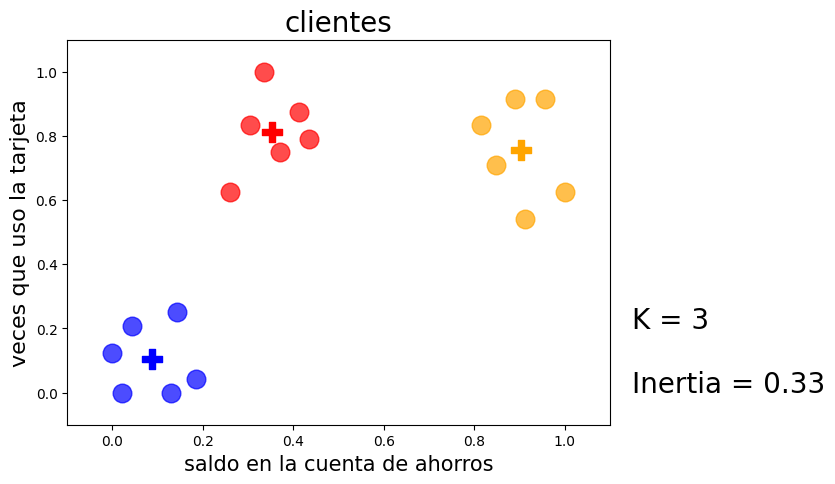

In [11]:
plt.figure(figsize= (7, 5), dpi= 100)
colores = ['red', 'blue', 'orange', 'black','purple', 'pink', 'brown']

for cluster in range(kmeans.n_clusters):

    plt.scatter(clientes_escalados[clientes_escalados['cluster'] == cluster]['saldo'], 
                clientes_escalados[clientes_escalados['cluster'] == cluster]['transacciones'],
                marker= 'o',
                s= 180, 
                color= colores[cluster], 
                alpha= 0.7)
    
    plt.scatter(kmeans.cluster_centers_[cluster][0],
                kmeans.cluster_centers_[cluster][1],
                marker= 'P', s= 200, color= colores[cluster])
    
plt.title('clientes', fontsize=20 )
plt.xlabel('saldo en la cuenta de ahorros', fontsize= 15)
plt.ylabel('veces que uso la tarjeta', fontsize= 16)
plt.text(1.15, 0.2, 'K = %i' %kmeans.n_clusters, fontsize= 20)
plt.text(1.15, 0, 'Inertia = %0.2f' %kmeans.inertia_, fontsize= 20)
plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)
plt.show()

## Método del codo

Como determinar el valor optimo de K; donde se visualize un gran cambio en la tendencia de la inercia, ese punto será el número de clusters optimos para agrupar los datos.

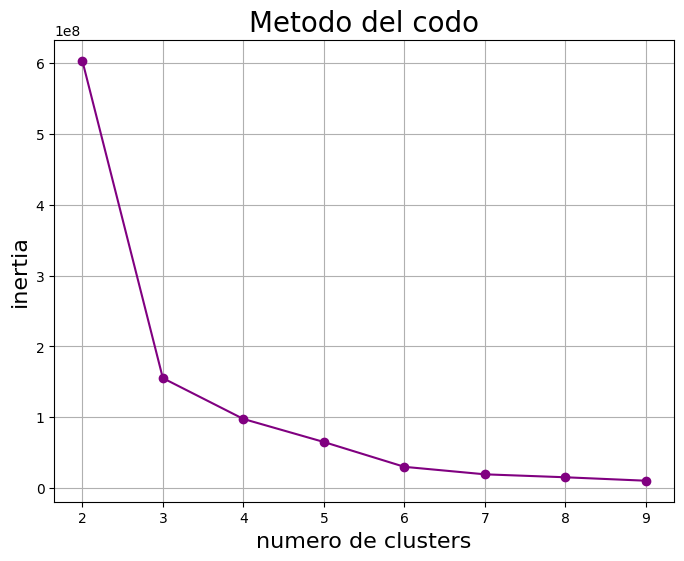

In [12]:
inertias = []

for k in range(2, 10):
    kmeans= KMeans(n_clusters= k, n_init= 'auto').fit(clientes)
    inertias.append(kmeans.inertia_)

plt.figure(figsize= (8, 6))
plt.plot(range(2, 10), inertias, marker= 'o', color= 'purple')
plt.grid()
plt.title('Metodo del codo', fontsize= 20)
plt.xlabel('numero de clusters', fontsize= 16)
plt.ylabel('inertia', fontsize= 16)
plt.show()